# Title
## Author
Amanda Herbst

**Link to github:** https://github.com/amandaherbst/eds220-thomas-fire

### Purpose

### Highlights of Analysis

### Dataset Description

### References to Datasets

## Import Libraries and Functions

In [1]:
# import libraries
import os
import pandas as pd
import xarray as xr
import numpy as np

import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

## Import Data

In [2]:
# read in 2017 and 2018 air quality data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# import landsat raster data
# create a file path
landsat_fp = os.path.join(os.getcwd(),'data', 'landsat8-2018-01-26-sb-simplified.nc')
# use file path to import raster
landsat = rioxr.open_rasterio(landsat_fp)

# import ca fire perimeters
ca_fire = gpd.read_file('data/California_Fire_Perimeters_2017/California_Fire_Perimeters_2017.shp')

## Geographical context of data

## Data Exploration

## Analysis
- Include subsections as necessary to guide reader through your analysis
- Include checks to see operations worked
- Checks must be short and informative: print specific attributes instead of running df.head() or printing entire objects.

In [3]:
# join the aqi datasets together
aqi = pd.concat([aqi_17, aqi_18])
# tidy aqi column names
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')
# filter by county name, and then only keep columns from date to the number of sites reporting
aqi_sb = aqi[aqi.county_name == 'Santa Barbara'].loc[:,'date':'number_of_sites_reporting']
# check date column object type
type(aqi_sb.date)
# convert date column from string to timestamps
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# set the date column to be the index
aqi_sb = aqi_sb.set_index('date')
# check dtype of index
type(aqi_sb.index)
# create new column to store the rolling 5 day averages
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

## Final output

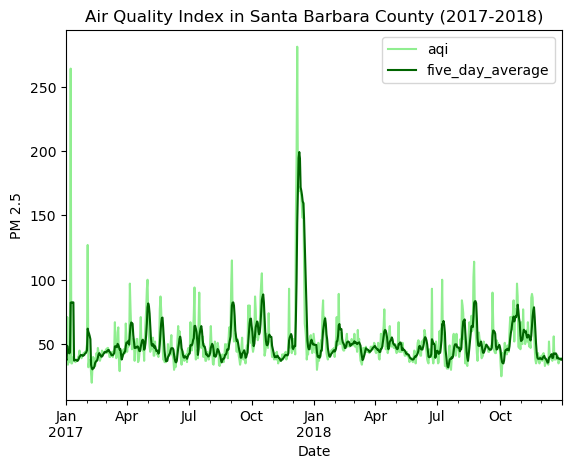

In [5]:
# plot daily AQI and 5-day average with updated labels, title, and colors
aqi_sb.plot(y = ['aqi', 'five_day_average'],
            xlabel = 'Date',
            ylabel = 'PM 2.5',
            color = {'aqi':'lightgreen',
                    'five_day_average':'darkgreen'},
            title = 'Air Quality Index in Santa Barbara County (2017-2018)')
plt.show()